In [1]:
import numpy as np
import astropy.units as u
import astropy.coordinates as SkyCoord
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
#%matplotlib inline
%matplotlib notebook
#matplotlib osx

In [2]:
m45 = pd.read_csv(r'm45new.csv')
m45

source_id         ra  ra_error        dec  dec_error  parallax  \
0     69806515778755712  56.333724  1.140488  24.702808   0.541175 -0.721175   
1     69805935959169664  56.270677  1.403003  24.654217   0.628636 -1.480490   
2     69805901600465536  56.248963  0.044308  24.646363   0.021987  1.540881   
3     69806382635516288  56.309686  1.456906  24.685571   0.729961  1.492044   
4     69805798521250560  56.248631  0.071177  24.642584   0.038868  0.848451   
...                 ...        ...       ...        ...        ...       ...   
9995  66730739375249664  56.802776  1.544253  24.281316   0.725982       NaN   
9996  66750186989083008  57.256836  0.100421  24.484274   0.051355  0.406343   
9997  66732800959842176  56.666629  2.225668  24.293604   1.388048       NaN   
9998  66719671243638656  57.101181  0.762665  24.212049   0.398485 -0.830830   
9999  66551274172739968  57.500736  0.707593  24.151657   0.343104  1.140940   

      parallax_error  phot_g_mean_mag     bp_rp   teff_val  
0           1.270854        20.438934  1.049389        NaN  
1           1.578097        20.613817  0.938259        NaN  
2           0.048536        14.885339  1.247749  4831.4224  
3           1.602928        20.641445  1.478289        NaN  
4           0.079828        16.319607  1.316325  4761.9200  
...              ...              ...       ...        ...  
9995             NaN        20.551151  0.785620        NaN  
9996        0.108909        17.250050  1.012783        NaN  
9997             NaN        20.849798  1.253931        NaN  
9998        0.811055        20.044933  0.828512        NaN  
9999        0.782912        20.140114  1.281557        NaN  

[10000 rows x 10 columns]

In [3]:
m45.phot_g_mean_mag.notnull()
m45_mag = m45[m45.phot_g_mean_mag.notnull()]
m45_mag

source_id         ra  ra_error        dec  dec_error  parallax  \
0     69806515778755712  56.333724  1.140488  24.702808   0.541175 -0.721175   
1     69805935959169664  56.270677  1.403003  24.654217   0.628636 -1.480490   
2     69805901600465536  56.248963  0.044308  24.646363   0.021987  1.540881   
3     69806382635516288  56.309686  1.456906  24.685571   0.729961  1.492044   
4     69805798521250560  56.248631  0.071177  24.642584   0.038868  0.848451   
...                 ...        ...       ...        ...        ...       ...   
9995  66730739375249664  56.802776  1.544253  24.281316   0.725982       NaN   
9996  66750186989083008  57.256836  0.100421  24.484274   0.051355  0.406343   
9997  66732800959842176  56.666629  2.225668  24.293604   1.388048       NaN   
9998  66719671243638656  57.101181  0.762665  24.212049   0.398485 -0.830830   
9999  66551274172739968  57.500736  0.707593  24.151657   0.343104  1.140940   

      parallax_error  phot_g_mean_mag     bp_rp   teff_val  
0           1.270854        20.438934  1.049389        NaN  
1           1.578097        20.613817  0.938259        NaN  
2           0.048536        14.885339  1.247749  4831.4224  
3           1.602928        20.641445  1.478289        NaN  
4           0.079828        16.319607  1.316325  4761.9200  
...              ...              ...       ...        ...  
9995             NaN        20.551151  0.785620        NaN  
9996        0.108909        17.250050  1.012783        NaN  
9997             NaN        20.849798  1.253931        NaN  
9998        0.811055        20.044933  0.828512        NaN  
9999        0.782912        20.140114  1.281557        NaN  

[10000 rows x 10 columns]

In [4]:
m45_mag.bp_rp.notnull()
m45_filt = m45_mag[m45_mag.bp_rp.notnull()]
m45_filt

source_id         ra  ra_error        dec  dec_error  parallax  \
0     69806515778755712  56.333724  1.140488  24.702808   0.541175 -0.721175   
1     69805935959169664  56.270677  1.403003  24.654217   0.628636 -1.480490   
2     69805901600465536  56.248963  0.044308  24.646363   0.021987  1.540881   
3     69806382635516288  56.309686  1.456906  24.685571   0.729961  1.492044   
4     69805798521250560  56.248631  0.071177  24.642584   0.038868  0.848451   
...                 ...        ...       ...        ...        ...       ...   
9995  66730739375249664  56.802776  1.544253  24.281316   0.725982       NaN   
9996  66750186989083008  57.256836  0.100421  24.484274   0.051355  0.406343   
9997  66732800959842176  56.666629  2.225668  24.293604   1.388048       NaN   
9998  66719671243638656  57.101181  0.762665  24.212049   0.398485 -0.830830   
9999  66551274172739968  57.500736  0.707593  24.151657   0.343104  1.140940   

      parallax_error  phot_g_mean_mag     bp_rp   teff_val  
0           1.270854        20.438934  1.049389        NaN  
1           1.578097        20.613817  0.938259        NaN  
2           0.048536        14.885339  1.247749  4831.4224  
3           1.602928        20.641445  1.478289        NaN  
4           0.079828        16.319607  1.316325  4761.9200  
...              ...              ...       ...        ...  
9995             NaN        20.551151  0.785620        NaN  
9996        0.108909        17.250050  1.012783        NaN  
9997             NaN        20.849798  1.253931        NaN  
9998        0.811055        20.044933  0.828512        NaN  
9999        0.782912        20.140114  1.281557        NaN  

[9113 rows x 10 columns]

In [5]:
m45_g = m45_filt['phot_g_mean_mag'].to_numpy()
m45_bprp = m45_filt['bp_rp'].to_numpy()

<IPython.core.display.Javascript object>


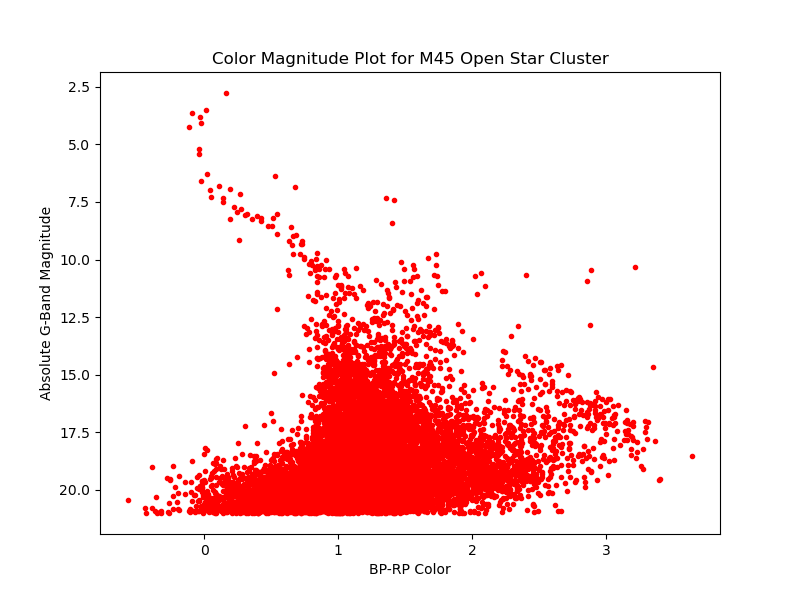

In [6]:
plt.figure(figsize=(8,6))
plt.gca().invert_yaxis()
plt.title('Color Magnitude Plot for M45 Open Star Cluster')
plt.xlabel('BP-RP Color')
plt.ylabel('Absolute G-Band Magnitude')
plt.plot(m45_bprp, m45_g, 'r.')
plt.show()

In [7]:
m45_filt.teff_val.notnull()

0       False
1       False
2        True
3       False
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: teff_val, Length: 9113, dtype: bool

In [8]:
m45_new = m45_filt[m45_filt.teff_val.notnull()]
m45_new

source_id         ra  ra_error        dec  dec_error  parallax  \
2     69805901600465536  56.248963  0.044308  24.646363   0.021987  1.540881   
4     69805798521250560  56.248631  0.071177  24.642584   0.038868  0.848451   
5     69805935960203392  56.270541  0.098350  24.647477   0.054222  0.691943   
15    65187849685130240  56.245596  0.061326  23.651293   0.029811  0.298666   
16    65176510971465216  56.341424  0.025689  23.684912   0.015105  0.653787   
...                 ...        ...       ...        ...        ...       ...   
9971  66523928113176320  57.115484  0.074054  24.044201   0.044898  0.484390   
9973  66499532699094016  57.342028  0.058260  23.759412   0.024539  0.273107   
9980  66512348881466496  57.453417  0.080151  23.960246   0.033096  0.630372   
9985  66526127136550784  57.290684  0.472030  24.053218   0.347867  8.429236   
9988  66513310954142464  57.391770  0.114172  23.979378   0.044982  0.685296   

      parallax_error  phot_g_mean_mag     bp_rp   teff_val  
2           0.048536        14.885339  1.247749  4831.4224  
4           0.079828        16.319607  1.316325  4761.9200  
5           0.112658        16.733790  1.673088  4297.5000  
15          0.059895        15.537921  1.386350  4794.0050  
16          0.026732        13.937604  1.109597  5009.0000  
...              ...              ...       ...        ...  
9971        0.088448        15.318340  1.273892  4771.2466  
9973        0.068081        15.508502  1.223769  4855.0000  
9980        0.087351        16.343540  1.119867  5032.3335  
9985        0.555468         3.531231  0.015700  8060.0000  
9988        0.128562        16.917416  1.333229  4729.8267  

[1869 rows x 10 columns]

In [9]:
m45_final_g = m45_new['phot_g_mean_mag'].to_numpy()
m45_final_bprp = m45_new['bp_rp'].to_numpy()
m45_final_teff = m45_new['teff_val'].to_numpy()

<IPython.core.display.Javascript object>


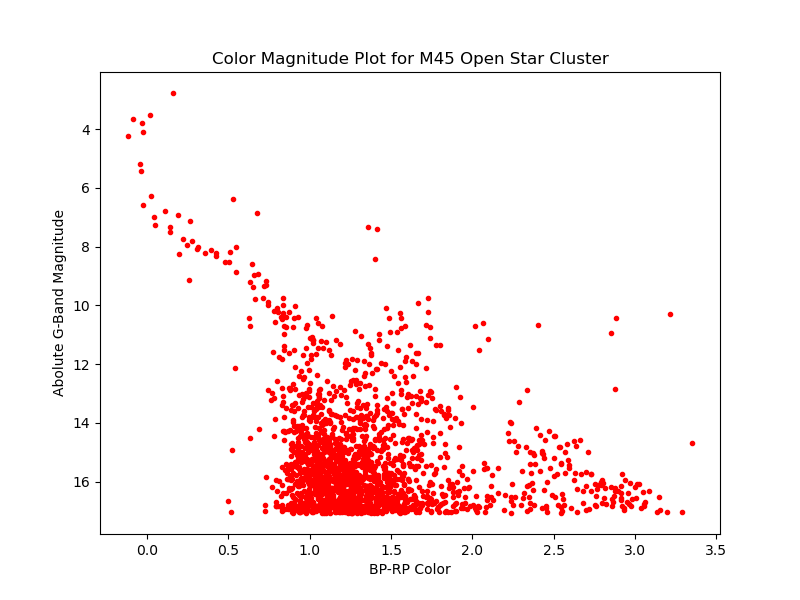

In [10]:
plt.figure(figsize=(8,6))
plt.gca().invert_yaxis()
plt.title('Color Magnitude Plot for M45 Open Star Cluster')
plt.xlabel('BP-RP Color')
plt.ylabel('Abolute G-Band Magnitude')
plt.plot(m45_final_bprp, m45_final_g, 'r.')
plt.show()

<IPython.core.display.Javascript object>


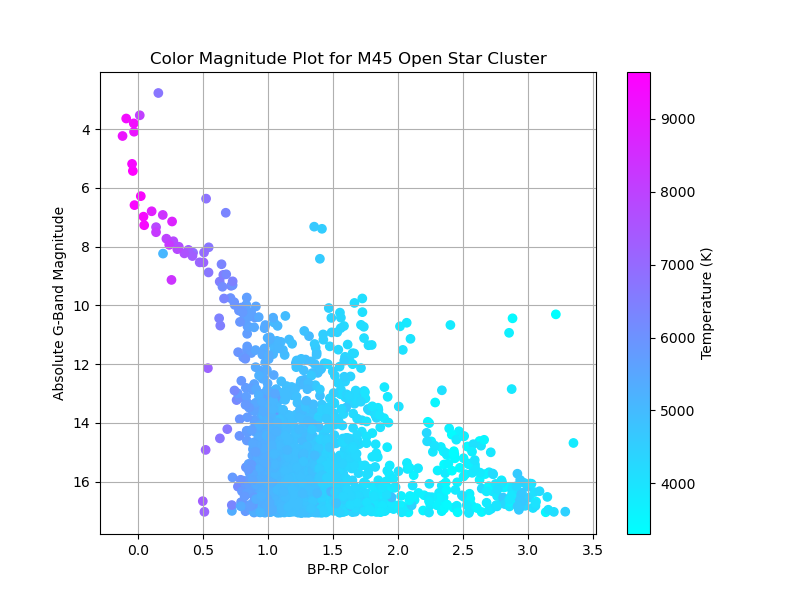

In [11]:
plt.figure(figsize=(8,6))
plt.gca().invert_yaxis()
plt.scatter(m45_final_bprp, m45_final_g, c=m45_final_teff, alpha=1.0) #alpha is the transparency 
plt.cool()       
plt.colorbar(label='Temperature (K)') 
plt.grid()
plt.title('Color Magnitude Plot for M45 Open Star Cluster')
plt.xlabel('BP-RP Color')
plt.ylabel('Absolute G-Band Magnitude')
plt.show()

<IPython.core.display.Javascript object>


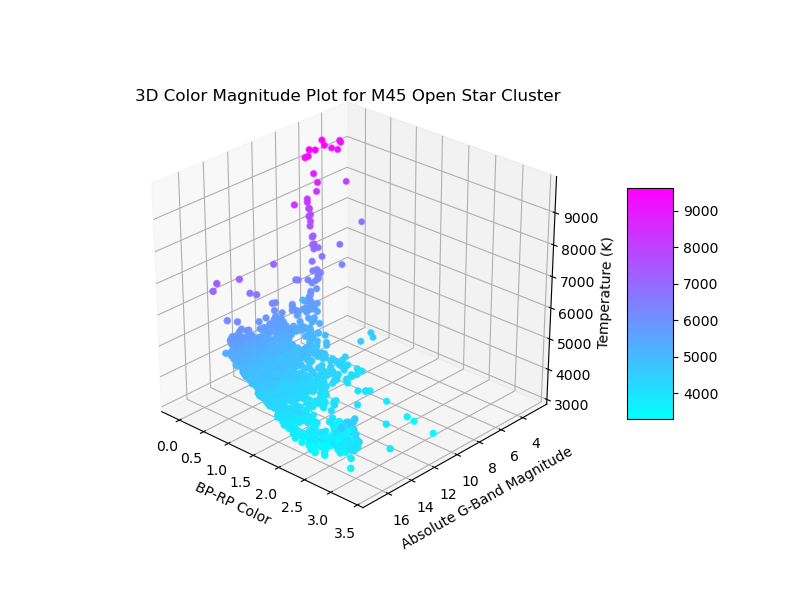

In [12]:
x = m45_final_bprp
y = m45_final_g
z = m45_final_teff

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection="3d")
surf = ax.scatter3D(x, y, z, c=z)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.invert_yaxis()
ax.set_title("3D Color Magnitude Plot for M45 Open Star Cluster")
ax.set_xlabel('BP-RP Color')
ax.set_ylabel('Absolute G-Band Magnitude')
ax.set_zlabel('Temperature (K)')

plt.show()

<IPython.core.display.Javascript object>


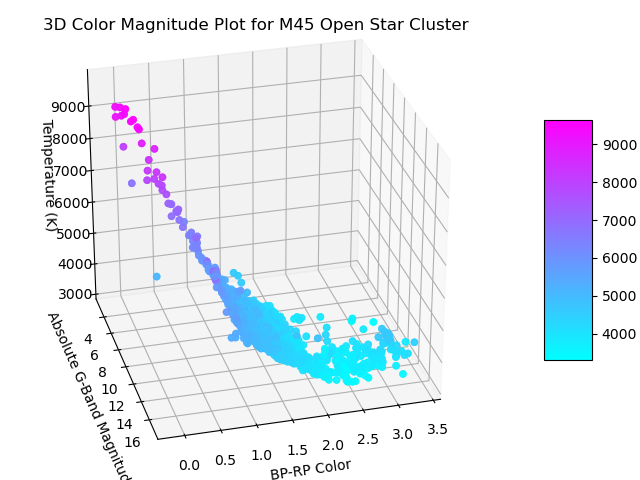

In [16]:
fig = plt.figure()
ax = Axes3D(fig)

ax.invert_yaxis()
ax.set_title("3D Color Magnitude Plot for M45 Open Star Cluster")
ax.set_xlabel('BP-RP Color')
ax.set_ylabel('Absolute G-Band Magnitude')
ax.set_zlabel('Temperature (K)')
fig.colorbar(surf, shrink=0.5, aspect=5)

def init():
    ax.scatter(x, y, z, marker='o', c=z, alpha=0.6)
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('m45newanimation30.mp4', fps=30, bitrate=1500)